In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
import re
from string import punctuation
import datetime
import math
pd.set_option('max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# ['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis',
#      'Orientation', 'Dir', 'NflId', 'DisplayName', 'YardLine',
#      'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
#      'FieldPosition', 'NflIdRusher', 'OffenseFormation',
#      'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
#      'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards'])

In [4]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['JerseyNumber', 'Location', 'PlayerCollegeName', 'WindDirection', 'Orientation'])
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Dir,NflId,DisplayName,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,177.18,496723,Eric Berry,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,SS,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,198.70,2495116,Allen Bailey,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,DE,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,202.73,2495493,Justin Houston,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,DE,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,105.64,2506353,Derrick Johnson,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,ILB,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,164.31,2530794,Ron Parker,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,FS,NE,KC,1,Gillette Stadium,Outdoor,Field Turf,Clear and warm,63.0,77.0,8


In [5]:
df.tail()

,GameId,PlayId,Team,X,Y,S,A,Dis,Dir,NflId,DisplayName,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed
509757,2018123015,20181230154157,home,86.77,24.20,2.14,2.12,0.22,15.31,2555289,Nick Vannett,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-6,261,03/06/1993,TE,SEA,ARI,17,CenturyLink Field,Outdoor,FieldTurf,Cloudy,45.0,76.0,5
509758,2018123015,20181230154157,home,86.76,27.18,1.16,0.66,0.11,42.80,2555395,Germain Ifedi,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-5,325,06/02/1994,G,SEA,ARI,17,CenturyLink Field,Outdoor,FieldTurf,Cloudy,45.0,76.0,5
509759,2018123015,20181230154157,home,87.26,27.05,2.59,1.18,0.26,21.12,2556524,George Fant,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-5,322,07/19/1992,OT,SEA,ARI,17,CenturyLink Field,Outdoor,FieldTurf,Cloudy,45.0,76.0,5
509760,2018123015,20181230154157,home,84.57,24.37,4.36,1.79,0.47,183.34,2557891,Ethan Pocic,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-6,320,08/05/1995,C,SEA,ARI,17,CenturyLink Field,Outdoor,FieldTurf,Cloudy,45.0,76.0,5
509761,2018123015,20181230154157,home,80.80,26.35,4.87,4.10,0.45,118.24,2558865,Chris Carson,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,5-11,222,09/16/1994,RB,SEA,ARI,17,CenturyLink Field,Outdoor,FieldTurf,Cloudy,45.0,76.0,5


In [6]:
def clean_StadiumType(text):
    text = str(text)
    text = text.replace('Retractable Roof', 'Retractable Roof - Closed')
    text = text.replace('Outdoors', 'Outdoor')
    text = text.replace('Ourdoor', 'Outdoor')
    text = text.replace('Outdor', 'Outdoor') 
    text = text.replace('Oudoor', 'Outdoor') 
    text = text.replace('Bowl', 'Outdoor') 
    text = text.replace('Heinz Field', 'Outdoor') 
    text = text.replace('Cloudy', 'Outdoor') 
    text = text.replace('Open', 'Outdoor') 
    text = text.replace('Outddors', 'Outdoor')
    text = text.replace('Outside', 'Outdoor') 
    text = text.replace('Indoors', 'Indoor') 
    text = text.replace('Dome', 'Indoor') 
    text = text.replace('Domed, closed', 'Indoor') 
    text = text.replace('Closed Dome', 'Indoor') 
    text = text.replace('Domed', 'Indoor') 
    text = text.replace('Dome, closed', 'Indoor') 
    text = text.replace('Indoor, Roof Closed', 'Retractable Roof - Closed') 
    text = text.replace('Indoor, Outdoor Roof', 'Indoor') 
    text = text.replace('Domed, Outdoor', 'Indoor') 
    text = text.replace('Indoord, open', 'Retractable Roof - Open') 
    text = text.replace('Closed Indoor', 'Retractable Roof - Closed') 
    text = text.replace('Indoor, closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof - Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Retr. Roof-Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Indoord', 'Indoor') 
    text = text.replace('Retr. Roof-Closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof - Closed', 'Retractable Roof - Closed') 
    text = text.replace('Retr. Roof Closed', 'Retractable Roof - Closed') 
    text = text.replace('Outdoor Retr Roof-Outdoor', 'Retractable Roof - Open') 
    text = text.replace('Indoor, Outdoor', 'Indoor') 
    text = text.replace('Indoor, closed', 'Retractable Roof - Closed') 
    text = text.replace('nan', 'Outdoor') 
    return text

In [7]:
def clean_PossessionTeam(text):
    text = str(text)
    text = text.replace('ARZ', 'ARI')
    text = text.replace('BLT', 'BAL') 
    text = text.replace('CLV', 'CLE') 
    text = text.replace('HST', 'HOU') 
    return text

In [8]:
def clean_FieldPosition(text):
    text = str(text)
    text = text.replace('ARZ', 'ARI')
    text = text.replace('BLT', 'BAL') 
    text = text.replace('CLV', 'CLE') 
    text = text.replace('HST', 'HOU') 
    
    return text

In [9]:
def clean_Turf(text):
    
    text = str(text.title())
    text = text.replace('Fieldturf', 'Field Turf')
    text = text.replace('Natural Grass', 'Grass') 
    text = text.replace('Artifical', 'Field Turf') 
    text = text.replace('Artificial', 'Field Turf')
    text = text.replace('Naturall Grass', 'Grass') 
    text = text.replace('Natural', 'Grass') 
    text = text.replace('Sisgrass', 'Dd Grassmaster') 
    text = text.replace('Field Turf360', 'Field Turf') 
    text = text.replace('Field Turf 360', 'Field Turf') 
    text = text.replace('Ubu Speed Series-S5-M', 'Ubu Sports Speed S5-M') 
    text = text.replace('Twenty-Four/Seven Turf', 'Field Turf') 
    
    return text

In [10]:
def clean_Stadium(text):
    
    text = text.replace('Sports Authority Field at Mile High', 'Broncos Stadium') 
    text = text.replace('Broncos Stadium At Mile High', 'Broncos Stadium') 
    text = text.replace('Broncos Stadium at Mile High', 'Broncos Stadium') 
    text = text.replace('Mercedes-Benz Dome', 'Mercedes-Benz Superdome') 
    text = text.replace('MetLife', 'MetLife Stadium') 
    text = text.replace('Metlife Stadium', 'MetLife Stadium') 
    text = text.replace('NRG', 'NRG Stadium') 
    text = text.replace('M & T Bank Stadium', 'M&T Bank Stadium')
    text = text.replace('Paul Brown Stadium', 'Paul Brown Stdium') 
    text = text.replace('NRG Stadium Stadium', 'NRG Stadium') 
    text = text.replace('Lambeau field', 'Lambeau Field') 
    text = text.replace('CenturyField', 'CenturyLink Field') 
    text = text.replace('CenturyLink', 'CenturyLink Field') 
    text = text.replace('MetLife Stadium Stadium', 'MetLife Stadium') 
    text = text.replace('FirstEnergyStadium', 'FirstEnergy Stadium') 
    text = text.replace('FirstEnergy', 'FirstEnergy Stadium') 
    text = text.replace('M&T Stadium', 'M&T Bank Stadium') 
    text = text.replace('FirstEnergy Stadium Stadium', 'FirstEnergy Stadium') 
    text = text.replace('Everbank Field', 'EverBank Field') 
    text = text.replace('TIAA Bank Field', 'EverBank Field') 
    text = text.replace('CenturyLink Field Field', 'CenturyLink Field')
    text = text.replace('Twickenham', 'Twickenham Stadium')
    text = text.replace('University of Phoenix Stadium', 'State Farm Stadium')
    text = text.replace('First Energy Stadium', 'FirstEnergy Stadium') 
    text = text.replace('Oakland-Alameda County Coliseum', 'Oakland Alameda-County Coliseum') 
    text = text.replace('Los Angeles Memorial Coliesum', 'Los Angeles Memorial Coliseum') 
    text = text.replace('Twickenham Stadium Stadium', 'Twickenham Stadium') 
    
    return text

In [11]:
def clean_GameWeather(text):
    
    text = str(text).title() 
    text = text.replace('T: 51; H: 55; W: Nw 10 Mph', 'Windy') 
    text = text.replace('Sunny, Windy', 'Windy') 
    text = text.replace('Cloudy With Periods Of Rain, Thunder Possible. Winds Shifting To Wnw, 10-20 Mph.', 'Windy') 
    text = text.replace('Controlled Climate', 'Indoor') 
    text = text.replace('Indoors', 'Indoor')
    text = text.replace('N/A (Indoors)', 'Indoor') 
    text = text.replace('N/A Indoor', 'Indoor') 
    text = text.replace('Clear And Warm', 'Sunny') 
    text = text.replace('Sun & Clouds', 'Sunny')
    text = text.replace('Mostly Sunny', 'Sunny') 
    text = text.replace('Sunny, Highs To Upper 80S', 'Sunny') 
    text = text.replace('Partly Cloudy', 'Sunny') 
    text = text.replace('Clear Skies', 'Sunny') 
    text = text.replace('Party Cloudy', 'Sunny') 
    text = text.replace('Clear And Sunny', 'Sunny') 
    text = text.replace('Mostly Sunny', 'Sunny') 
    text = text.replace('Sunny And Warm', 'Sunny') 
    text = text.replace('Clear And Sunny', 'Sunny') 
    text = text.replace('Sunny And clear', 'Sunny') 
    text = text.replace('Mostly Sunny Skies', 'Sunny') 
    text = text.replace('Sunny Skies', 'Sunny') 
    text = text.replace('Clear', 'Sunny') 
    text = text.replace('Partly Cloudy', 'Cloudy') 
    text = text.replace('Mostly Cloudy', 'Cloudy') 
    text = text.replace('Partly Sunny', 'Cloudy') 
    text = text.replace('Fair', 'Cloudy') 
    text = text.replace('Hazy', 'Cloudy')
    text = text.replace('Overcast', 'Cloudy') 
    text = text.replace('Sunny And Cold', 'Sunny') 
    text = text.replace('Sunny Skies', 'Sunny') 
    text = text.replace('Cloudy And Cool', 'Cloudy') 
    text = text.replace('Mostly Coudy', 'Cloudy') 
    text = text.replace('Cloudy And Cold', 'Cloudy') 
    text = text.replace('Partly Clouidy', 'Cloudy') 
    text = text.replace('Cloudy, Fog Started Developing In 2Nd Quarter', 'Cloudy') 
    text = text.replace('Sunny And Cool', 'Sunny') 
    text = text.replace('Coudy', 'Cloudy')
    text = text.replace('Sunny And Sunny', 'Sunny') 
    text = text.replace('N/A (Indoor)', 'Indoor') 
    text = text.replace('Light Rain', 'Rain') 
    text = text.replace('Showers', 'Rain') 
    text = text.replace('30% Chance Of Rain', 'Rain') 
    text = text.replace('Rain Likely, Temps In Low 40S.', 'Rain') 
    text = text.replace('Cloudy, Chance Of Rain', 'Rain') 
    text = text.replace('Scattered Showers', 'Rain') 
    text = text.replace('Rain Chance 40%', 'Rain')
    text = text.replace('Cloudy, 50% Change Of Rain', 'Rain') 
    text = text.replace('Cloudy, Rain', 'Rain') 
    text = text.replace('Rain Shower', 'Rain') 
    text = text.replace('Rainy', 'Rain') 
    text = text.replace('Heavy Lake Effect Snow', 'Snow') 
    text = text.replace('Cloudy, Light Snow Accumulating 1-3"', 'Snow') 
    text = text.replace('Scattered Rain', 'Rain') 
    
    return text
    

In [12]:
def clean_WindSpeed(text):
    
    text = str(text).upper()
    text = text.replace('SSW', '5') 
    text = text.replace('CALM', '5') 
    text = text.replace('NAN', '5') 
    text = text.replace('E', '5') 
    text = text.replace('N', '5') 
    text = text.replace('S', '5') 
    text = text.replace('W', '5') 
    text = text.replace('NW', '5') 
    text = text.replace('SW', '5')
    text = text.replace('-', ' ')
    text = text.replace('.', ' ')
    text = text.strip("QWERTYUIOPASDGFHJKLZXCMVNB")
    text = text[:2]
    text = float(text)
    
    return text

In [13]:
# Applying all the functions above and cleaning all the features
df['StadiumType'] = df['StadiumType'].apply(clean_StadiumType)
df['PossessionTeam'] = df['PossessionTeam'].apply(clean_PossessionTeam)
df['FieldPosition'] = df['FieldPosition'].apply(clean_FieldPosition)
df['Turf'] = df['Turf'].apply(clean_Turf)
df['Stadium'] = df['Stadium'].apply(clean_Stadium)
df['GameWeather'] = df['GameWeather'].apply(clean_GameWeather)
df['WindSpeed'] = df['WindSpeed'].apply(clean_WindSpeed)
df['FieldPosition'] = np.where(df["FieldPosition"] == 'nan', df['HomeTeamAbbr'], df['FieldPosition'])
df["DefendersInTheBox"] = df['DefendersInTheBox'].fillna(df['DefendersInTheBox'].mean())

In [14]:
# Filling in the Temperature Na values - average indoor temp is 68 and retractable open in 65
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'Temperature'] = '68'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'Temperature'] = '65'
df['Temperature'] = [float(x) for x in df['Temperature']]

In [15]:
# Doing the same thing as above, but this time its for average humidity
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'Humidity'] = '45'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'Humidity'] = '60'
df['Humidity'] = [float(x) for x in df['Humidity']]

In [16]:
# Now filling in windspeed, using .1 rather than 0 to have it not be a null, but carries small significance 
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'WindSpeed'] = '.1'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'WindSpeed'] = '.1'
df['WindSpeed'] = [float(x) for x in df['WindSpeed']]

In [17]:
# Labeling the weather given StadiumType, WindSpeed and Temperature
df.loc[(df.StadiumType == 'Indoor') | 
                    (df.StadiumType == 'Retractable Roof - Closed'), 'GameWeather'] = 'Indoor'
df.loc[(df.StadiumType == 'Retractable Roof - Open'), 'GameWeather'] = 'Sunny'
df.loc[(df.StadiumType == 'Outdoor') & (df["WindSpeed"] > 9.9), 'GameWeather'] = 'Windy'
df.loc[(df.StadiumType == 'Outdoor') & (df["Temperature"] < 41), 'GameWeather'] = 'Cold'
df.loc[(df.StadiumType == 'Outdoor') & (df["GameWeather"] == 'Nan'), 'GameWeather'] = 'Sunny'

In [18]:
# Because Quarter is a feature, we can just make convert this column into seconds that are left in the quarter
def GameClock_seconds(text):
    text = text.split(':')
    seconds = int(text[0])*60 + int(text[1]) + int(text[2])/60
    return seconds

In [19]:
df['GameClock'] = df['GameClock'].apply(GameClock_seconds)

In [20]:
# Getting the BMI for the players 
df['PlayerHeight'] = df['PlayerHeight'].apply(lambda x: 12*int(x.split('-')[0])+int(x.split('-')[1]))
df['BMI'] = 703*(df['PlayerWeight']/(df['PlayerHeight'])**2)

In [21]:
# Converting the time features into datetime
df['TimeHandoff'] = df['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
df['TimeSnap'] = df['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

In [22]:
# Creating a new feature that is the time between the snap and the handoff
# When t=0, it must be wildcat formation or less than .5 seconds until the handoff
df['TimeDelta'] = df.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)

In [23]:
df['IsBallCarrier'] = df['NflId'] == df['NflIdRusher']

In [24]:
# This may be a consufing block of code, but it does a lot of necassary things
# Flips the plays to that all the plays are going to the right, if you were in the pressbox watching the play
# Turns the direction (in degrees) to radians (Dir_rad), then Dir_rad2 makes it so all the radians are equal to plays going left 
df['RunLeft'] = df['PlayDirection'] =='left'
df['Dir_rad'] = np.mod(90 - df['Dir'], 360) * math.pi/180.0
df['TeamOnOffense'] = "home"
df.loc[df['PossessionTeam'] != df['HomeTeamAbbr'], 'TeamOnOffense'] = "away"
df['IsOnOffense'] = df['Team'] == df['TeamOnOffense'] # Is player on offense?
df['YardLine_std'] = 100 - df['YardLine']
df.loc[df['FieldPosition'].fillna('') == df['PossessionTeam'],  'YardLine_std'] = df['YardLine']
df['X_std'] = df['X']
df.loc[df['RunLeft'], 'X_std'] = 120 - df.loc[df['RunLeft'], 'X'] 
df['Y_std'] = df['Y']
df.loc[df['RunLeft'], 'Y_std'] = 160/3 - df.loc[df['RunLeft'], 'Y'] 
df['Dir_std2'] = df['Dir']
df.loc[df['RunLeft'], 'Dir_std2'] = np.mod(180 + df.loc[df['RunLeft'], 'Dir_std2'], 360)
df['Dir_rad2'] = df['Dir_rad']
df.loc[df['RunLeft'], 'Dir_rad2'] = np.mod(np.pi + df.loc[df['RunLeft'], 'Dir_rad'], 2*np.pi)

In [25]:
# df2 = df.copy()

In [26]:
# Get distance to back for players @ handoff

def euclidean_distance(x1,y1,x2,y2):
    x_diff = (x1-x2)**2
    y_diff = (y1-y2)**2

    return np.sqrt(x_diff + y_diff)

def back_position(df):
    running_backs = df[df['NflId'] == df['NflIdRusher']][['GameId','PlayId','NflIdRusher','X_std','Y_std','Dir_std2','YardLine_std']]
    running_backs = running_backs.rename(columns={'X_std':'back_X', 'Y_std':'back_Y'})
    
    return running_backs

def other_players(df, running_backs):
    player_distance = df[['GameId','PlayId','NflId','X_std','Y_std', 'IsOnOffense']]
    player_distance = pd.merge(player_distance, running_backs, on=['GameId','PlayId'], how='inner')
    player_distance['DistanceToBack'] = player_distance[['X_std','Y_std','back_X','back_Y']].apply(lambda x: euclidean_distance(x[0],x[1],x[2],x[3]), axis=1)

    df['DistanceToBack'] = player_distance['DistanceToBack']
    
    return df

In [27]:
running_backs = back_position(df)
df = other_players(df, running_backs)

In [28]:
def split_personnel(text):
    split_up = text.split(',')
    for i in range(len(split_up)):
        split_up[i] = split_up[i].strip()

    return split_up

def defense_formation(text):
    dl = 0
    lb = 0
    db = 0
    other = 0

    for position in text:
        sub_string = position.split(' ')
        if sub_string[1] == 'DL':
            dl += int(sub_string[0])
        elif sub_string[1] in ['LB','OL']:
            lb += int(sub_string[0])
        else:
            db += int(sub_string[0])

    def_pos_count = (dl,lb,db,other)

    return def_pos_count

def offense_formation(text):
    qb = 0
    rb = 0
    wr = 0
    te = 0
    ol = 0

    sub_total = 0
    qb_listed = False
    for position in text:
        sub_string = position.split(' ')
        pos = sub_string[1]
        cnt = int(sub_string[0])

        if pos == 'QB':
            qb += cnt
            sub_total += cnt
            qb_listed = True
        
        elif pos in ['RB','LB']:
            rb += cnt
            sub_total += cnt
        
        elif pos in ['WR','DB']:
            wr += cnt
            sub_total += cnt
        elif pos == 'TE':
            te += cnt
            sub_total += cnt
        
        else:
            ol += cnt
            sub_total += cnt
            
# Making some assumptions on the formation...filling with a QB if not listed, else filling with OL because of the liklihood of heavy sets
    if sub_total < 11:
        diff = 11 - sub_total
        if not qb_listed:
            qb += 1
            diff -= 1
        ol += diff

    off_pos_count = (qb,rb,wr,te,ol)

    return off_pos_count

In [29]:
df['DefensePersonnel'] = df['DefensePersonnel'].apply(lambda x : split_personnel(x))
df['DefensePersonnel'] = df['DefensePersonnel'].apply(lambda x: defense_formation(x))
df['num_DL'] = df['DefensePersonnel'].apply(lambda x: x[0])
df['num_LB'] = df['DefensePersonnel'].apply(lambda x: x[1])
df['num_DB'] = df['DefensePersonnel'].apply(lambda x: x[2])

In [30]:
df['OffensePersonnel'] = df['OffensePersonnel'].apply(lambda x: split_personnel(x))
df['OffensePersonnel'] = df['OffensePersonnel'].apply(lambda x: offense_formation(x))
df['num_QB'] = df['OffensePersonnel'].apply(lambda x: x[0])
df['num_RB'] = df['OffensePersonnel'].apply(lambda x: x[1])
df['num_WR'] = df['OffensePersonnel'].apply(lambda x: x[2])
df['num_TE'] = df['OffensePersonnel'].apply(lambda x: x[3])
df['num_OL'] = df['OffensePersonnel'].apply(lambda x: x[4])

In [31]:
# Filling in other rules
df.loc[(df.OffenseFormation.isna()) & 
                    (df.num_WR > 2.5), 'OffenseFormation'] = 'SHOTGUN'
df.loc[(df.OffenseFormation.isna()) & 
                    (df.num_OL > 5.5), 'OffenseFormation'] = 'JUMBO'
df.loc[(df.OffenseFormation.isna()) & 
                    (df.num_TE > 2.5), 'OffenseFormation'] = 'JUMBO'
df['DefendersInTheBox'] = [round(x) for x in df['DefendersInTheBox']]

In [32]:
# Dropping other Nas
df = df.dropna()

In [33]:
# Dropping all the features we dont need for the final DF
df = df.drop(columns=['Dir', 'Dir_rad', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate', 'DisplayName', 'YardLine', 
                      'FieldPosition', 'X', 'Y', 'OffensePersonnel', 'DefensePersonnel', 'Season', 'Position'])

In [34]:
df.isna().sum()

GameId                    0
PlayId                    0
Team                      0
S                         0
A                         0
Dis                       0
NflId                     0
Quarter                   0
GameClock                 0
PossessionTeam            0
Down                      0
Distance                  0
HomeScoreBeforePlay       0
VisitorScoreBeforePlay    0
NflIdRusher               0
OffenseFormation          0
DefendersInTheBox         0
PlayDirection             0
TimeHandoff               0
TimeSnap                  0
Yards                     0
HomeTeamAbbr              0
VisitorTeamAbbr           0
Week                      0
Stadium                   0
StadiumType               0
Turf                      0
GameWeather               0
Temperature               0
Humidity                  0
WindSpeed                 0
BMI                       0
TimeDelta                 0
IsBallCarrier             0
RunLeft                   0
TeamOnOffense       

In [35]:
df.shape

(509748, 51)

In [36]:
df.columns

Index(['GameId', 'PlayId', 'Team', 'S', 'A', 'Dis', 'NflId', 'Quarter',
       'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher',
       'OffenseFormation', 'DefendersInTheBox', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week',
       'Stadium', 'StadiumType', 'Turf', 'GameWeather', 'Temperature',
       'Humidity', 'WindSpeed', 'BMI', 'TimeDelta', 'IsBallCarrier', 'RunLeft',
       'TeamOnOffense', 'IsOnOffense', 'YardLine_std', 'X_std', 'Y_std',
       'Dir_std2', 'Dir_rad2', 'DistanceToBack', 'num_DL', 'num_LB', 'num_DB',
       'num_QB', 'num_RB', 'num_WR', 'num_TE', 'num_OL'],
      dtype='object')

In [37]:
# ['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis',
#      'Orientation', 'Dir', 'NflId', 'DisplayName', 'YardLine',
#      'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
#      'FieldPosition', 'NflIdRusher', 'OffenseFormation',
#      'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
#      'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509748 entries, 0 to 509761
Data columns (total 51 columns):
GameId                    509748 non-null int64
PlayId                    509748 non-null int64
Team                      509748 non-null object
S                         509748 non-null float64
A                         509748 non-null float64
Dis                       509748 non-null float64
NflId                     509748 non-null int64
Quarter                   509748 non-null int64
GameClock                 509748 non-null float64
PossessionTeam            509748 non-null object
Down                      509748 non-null int64
Distance                  509748 non-null int64
HomeScoreBeforePlay       509748 non-null int64
VisitorScoreBeforePlay    509748 non-null int64
NflIdRusher               509748 non-null int64
OffenseFormation          509748 non-null object
DefendersInTheBox         509748 non-null int64
PlayDirection             509748 non-null object
TimeHandoff  

# /////////////////////
# END OF CLEAN NOTEBOOK
# /////////////////////

# /////////////////////
# TESTING NOTEBOOK
# /////////////////////

In [40]:
from sklearn import metrics, ensemble
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score 
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
X = df.copy()

In [42]:
X = X.drop(columns=['GameId','PlayId','Yards', 'NflId', 'Team', 'GameClock', 'PossessionTeam', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher',
                   'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'IsBallCarrier', 'RunLeft',
                   'TeamOnOffense', 'IsOnOffense'])

In [43]:
X_cat = X[['Quarter', 'Down', 'OffenseFormation', 'DefendersInTheBox', 'Stadium', 'StadiumType', 'Turf', 'GameWeather',
         'num_DL', 'num_LB', 'num_DB', 'num_QB', 'num_RB', 'num_WR', 'num_TE', 'num_OL']]
X_num = X[['S', 'A', 'Dis', 'Distance', 'Temperature', 'Humidity', 'WindSpeed', 'BMI', 'TimeDelta',
         'YardLine_std', 'X_std', 'Y_std', 'Dir_std2', 'Dir_rad2', 'DistanceToBack']]

In [44]:
X_cat['Quarter'] = [str(x) for x in X_cat['Quarter']]
X_cat['Down'] = [str(x) for x in X_cat['Down']]
X_cat['DefendersInTheBox'] = [str(x) for x in X_cat['DefendersInTheBox']]
X_cat['num_DL'] = [str(x) for x in X_cat['num_DL']]
X_cat['num_LB'] = [str(x) for x in X_cat['num_LB']]
X_cat['num_DB'] = [str(x) for x in X_cat['num_DB']]
X_cat['num_QB'] = [str(x) for x in X_cat['num_QB']]
X_cat['num_RB'] = [str(x) for x in X_cat['num_RB']]
X_cat['num_WR'] = [str(x) for x in X_cat['num_WR']]
X_cat['num_TE'] = [str(x) for x in X_cat['num_TE']]
X_cat['num_OL'] = [str(x) for x in X_cat['num_OL']]

In [45]:
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns = X_num.columns)

In [46]:
# Made a copy to use for column names later
X_cat2 = X_cat.copy()

In [47]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [48]:
le = MultiColumnLabelEncoder()
X_cat = le.fit_transform(X_cat)
X_cat.head()

,Quarter,Down,OffenseFormation,DefendersInTheBox,Stadium,StadiumType,Turf,GameWeather,num_DL,num_LB,num_DB,num_QB,num_RB,num_WR,num_TE,num_OL
0,0,2,5,7,10,1,2,4,2,3,5,0,1,3,1,1
1,0,2,5,7,10,1,2,4,2,3,5,0,1,3,1,1
2,0,2,5,7,10,1,2,4,2,3,5,0,1,3,1,1
3,0,2,5,7,10,1,2,4,2,3,5,0,1,3,1,1
4,0,2,5,7,10,1,2,4,2,3,5,0,1,3,1,1


In [49]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat_ohe = ohe.fit_transform(X_cat)
X_cat_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
ohe2 = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_cat_fin = ohe2.fit_transform(X_cat2)
X_cat_fin.head()

,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Quarter_5,Down_3,Down_1,Down_2,Down_4,OffenseFormation_SHOTGUN,OffenseFormation_SINGLEBACK,OffenseFormation_JUMBO,OffenseFormation_PISTOL,OffenseFormation_I_FORM,OffenseFormation_ACE,OffenseFormation_WILDCAT,OffenseFormation_EMPTY,DefendersInTheBox_6,DefendersInTheBox_7,DefendersInTheBox_9,DefendersInTheBox_5,DefendersInTheBox_8,DefendersInTheBox_11,DefendersInTheBox_10,DefendersInTheBox_4,DefendersInTheBox_3,DefendersInTheBox_2,DefendersInTheBox_1,Stadium_Gillette Stadium,Stadium_New Era Field,Stadium_Soldier Field,Stadium_Paul Brown Stdium,Stadium_FirstEnergy Stadium,Stadium_Ford Field,Stadium_NRG Stadium,Stadium_Nissan Stadium,Stadium_FedExField,Stadium_Los Angeles Memorial Coliseum,Stadium_Lambeau Field,Stadium_Levis Stadium,Stadium_AT&T Stadium,Stadium_U.S. Bank Stadium,Stadium_Broncos Stadium,Stadium_M&T Bank Stadium,Stadium_Bank of America Stadium,Stadium_Lucas Oil Stadium,Stadium_EverBank Field,Stadium_Arrowhead Stadium,Stadium_Mercedes-Benz Superdome,Stadium_Heinz Field,...,GameWeather_Windy,GameWeather_Indoor,GameWeather_Cloudy,GameWeather_Rain,GameWeather_Cold,num_DL_2,num_DL_4,num_DL_3,num_DL_5,num_DL_1,num_DL_6,num_DL_0,num_DL_7,num_LB_3,num_LB_4,num_LB_2,num_LB_1,num_LB_5,num_LB_6,num_LB_0,num_DB_6,num_DB_3,num_DB_4,num_DB_5,num_DB_2,num_DB_7,num_DB_1,num_DB_8,num_QB_1,num_QB_2,num_RB_1,num_RB_2,num_RB_0,num_RB_3,num_WR_3,num_WR_0,num_WR_1,num_WR_2,num_WR_4,num_WR_5,num_TE_1,num_TE_2,num_TE_3,num_TE_0,num_TE_4,num_OL_5,num_OL_6,num_OL_7,num_OL_4,num_OL_8
0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [51]:
X_final = pd.merge(X_num_scaled, X_cat_fin, left_index=True, right_index=True, how='inner')

In [52]:
X_final.head()

,S,A,Dis,Distance,Temperature,Humidity,WindSpeed,BMI,TimeDelta,YardLine_std,X_std,Y_std,Dir_std2,Dir_rad2,DistanceToBack,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Quarter_5,Down_3,Down_1,Down_2,Down_4,OffenseFormation_SHOTGUN,OffenseFormation_SINGLEBACK,OffenseFormation_JUMBO,OffenseFormation_PISTOL,OffenseFormation_I_FORM,OffenseFormation_ACE,OffenseFormation_WILDCAT,OffenseFormation_EMPTY,DefendersInTheBox_6,DefendersInTheBox_7,DefendersInTheBox_9,DefendersInTheBox_5,DefendersInTheBox_8,DefendersInTheBox_11,DefendersInTheBox_10,DefendersInTheBox_4,DefendersInTheBox_3,DefendersInTheBox_2,DefendersInTheBox_1,Stadium_Gillette Stadium,Stadium_New Era Field,Stadium_Soldier Field,Stadium_Paul Brown Stdium,Stadium_FirstEnergy Stadium,Stadium_Ford Field,Stadium_NRG Stadium,...,GameWeather_Windy,GameWeather_Indoor,GameWeather_Cloudy,GameWeather_Rain,GameWeather_Cold,num_DL_2,num_DL_4,num_DL_3,num_DL_5,num_DL_1,num_DL_6,num_DL_0,num_DL_7,num_LB_3,num_LB_4,num_LB_2,num_LB_1,num_LB_5,num_LB_6,num_LB_0,num_DB_6,num_DB_3,num_DB_4,num_DB_5,num_DB_2,num_DB_7,num_DB_1,num_DB_8,num_QB_1,num_QB_2,num_RB_1,num_RB_2,num_RB_0,num_RB_3,num_WR_3,num_WR_0,num_WR_1,num_WR_2,num_WR_4,num_WR_5,num_TE_1,num_TE_2,num_TE_3,num_TE_0,num_TE_4,num_OL_5,num_OL_6,num_OL_7,num_OL_4,num_OL_8
0,-0.651933,-0.566602,0.828906,-1.667708,0.100321,1.060378,0.405091,-0.684052,-0.565643,-0.515164,-0.504113,-1.148222,1.727092,-0.785013,-0.308017,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,-1.569860,-0.341281,-1.851936,-1.667708,0.100321,1.060378,0.405091,0.834805,-0.565643,-0.515164,-0.534021,-0.844264,-1.419735,-0.985574,-0.629235,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,-0.991638,-1.119663,0.210251,-1.667708,0.100321,1.060378,0.405091,0.363153,-0.565643,-0.515164,-0.507655,-0.921635,-1.382268,-1.023133,-0.483620,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-1.569860,-1.170872,-1.783196,-1.667708,0.100321,1.060378,0.405091,-0.291919,-0.565643,-0.515164,-0.407700,-0.161741,1.061989,-0.118276,-0.080123,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.557972,0.764840,-0.820843,-1.667708,0.100321,1.060378,0.405091,-0.854643,-0.565643,-0.515164,-0.323486,-1.228356,1.607440,-0.665067,0.396786,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [53]:
X_num_scaled['Yards'] = df['Yards']

In [54]:
X_num_scaled.dropna(inplace=True)

In [56]:
X_num_scaled.to_csv('train2.csv')

# ////////////////
# TRAIN_TEST_SPLIT
# ////////////////

In [54]:
X_final['Yards'] = df['Yards']

In [54]:
# y = np.zeros((yards.shape[0], 199))
# for idx, target in enumerate(list(yards)):
#     y[idx][99 + target] = 1

In [55]:
X = X_final.drop(columns='Yards')
y = X_final['Yards']

In [64]:
X2 = X_num_scaled.drop(columns='Yards')
y2 = X_num_scaled['Yards']

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25, random_state=42)

In [68]:
print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(382300, 15) (127434, 15)
(382300,) (127434,)


# //////////////////////////
# MULTIPLE LINEAR REGRESSION
# //////////////////////////

# Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)
y_hat_test = lr.predict(X2_test)
y_hat_prob = lr.predict_proba(X2_test)

In [90]:
print('Accuracy Score:', accuracy_score(y2_test, y_hat_test))
# print('Recall Score:', recall_score(y2_test, y_hat_test))
# print('Precision Score:', precision_score(y2_test, y_hat_test))
# print('F1 Score:', f1_score(y2_test, y_hat_test))

Accuracy Score: 0.13265690475069447


# KNN

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
preds = knn.predict(X2_test)

# also want actual probiblities
preds_probability = knn.predict_proba(X2_test)

accuracy_score(y2_test, preds)

0.1964075521446396

In [92]:
k_acc = {}
k_prec = {}
k_recall = {}

for k in range(2,15): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    preds = knn.predict(X2_test)

    preds_probability = knn.predict_proba(X2_test)

    accuracy = accuracy_score(y2_test, preds)
    k_acc[k] = accuracy
    
    precision = precision_score(y2_test, preds)
    k_prec[k] = precision
    
    recall = recall_score(y2_test, preds)
    k_recall[k] = recall

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(k_acc.keys()), list(k_acc.values()), color='red', label='Accuracy')
plt.plot(list(k_prec.keys()), list(k_prec.values()), color='Black', label='Precision')
plt.plot(list(k_recall.keys()), list(k_recall.values()), color='blue', label='Recall')
plt.legend(loc='lower right')
plt.rcParams['text.color'] = 'black'
plt.show()

# Gradient Boost

In [100]:
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(n_estimators=300, random_state=42)

In [101]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [102]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
gd_sr.fit(X2_train, y2_train)

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

In [99]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr.fit(X2_train, y2_train)

KeyboardInterrupt: 

In [ ]:
prediction = gbr.predict(X2_test)

accuracy = accuracy_score(y2_test, y_hat_test)

print("Accuracy: "+"{:.2%}".format(accuracy))

# Decision Tree

In [1]:
dt = DecisionTreeClassifier()
dt.fit(X2_train, y2_train)
y_hat = dt.predict(X2_test)
y_hat_probas = dt.predict_proba(X2_test)

NameError: name 'DecisionTreeClassifier' is not defined

In [94]:
accuracy_score(y2_test, y_hat)

0.6723009557888789

In [3]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_hat_probas2 = model.predict_proba(X_test)

NameError: name 'X_train' is not defined

In [96]:
accuracy_score(y2_test, y_predict)

0.6726697741576032

# TOP 3 DISTANCE

In [36]:
player_distance = pd.merge(player_distance, carriers, on=['GameId','PlayId'], how='inner')

In [39]:
player_distance['dist_to_back'] = player_distance[['X_std','Y_std','back_X','back_Y']].apply(lambda x: euclidean_distance(x[0],x[1],x[2],x[3]), axis=1)

In [38]:
player_distance.head(23)

,GameId,PlayId,NflId,X_std,Y_std,IsOnOffense,NflIdRusher,back_X,back_Y,Dir_std2,YardLine_std
0,2017090700,20170907000118,496723,46.09,18.493333,False,2543773,41.25,22.803333,65.74,35
1,2017090700,20170907000118,2495116,45.33,20.693333,False,2543773,41.25,22.803333,65.74,35
2,2017090700,20170907000118,2495493,46.00,20.133333,False,2543773,41.25,22.803333,65.74,35
3,2017090700,20170907000118,2506353,48.54,25.633333,False,2543773,41.25,22.803333,65.74,35
4,2017090700,20170907000118,2530794,50.68,17.913333,False,2543773,41.25,22.803333,65.74,35
5,2017090700,20170907000118,2543494,44.94,29.333333,False,2543773,41.25,22.803333,65.74,35
6,2017090700,20170907000118,2543637,45.89,36.693333,False,2543773,41.25,22.803333,65.74,35
7,2017090700,20170907000118,2543851,46.63,34.603333,False,2543773,41.25,22.803333,65.74,35
8,2017090700,20170907000118,2550257,63.37,26.433333,False,2543773,41.25,22.803333,65.74,35
9,2017090700,20170907000118,2552488,46.65,14.503333,False,2543773,41.25,22.803333,65.74,35


In [40]:
player_distance.shape

(509762, 12)

In [41]:
player_distance.head(22)

,GameId,PlayId,NflId,X_std,Y_std,IsOnOffense,NflIdRusher,back_X,back_Y,Dir_std2,YardLine_std,dist_to_back
0,2017090700,20170907000118,496723,46.09,18.493333,False,2543773,41.25,22.803333,65.74,35,6.480872
1,2017090700,20170907000118,2495116,45.33,20.693333,False,2543773,41.25,22.803333,65.74,35,4.593310
2,2017090700,20170907000118,2495493,46.00,20.133333,False,2543773,41.25,22.803333,65.74,35,5.448982
3,2017090700,20170907000118,2506353,48.54,25.633333,False,2543773,41.25,22.803333,65.74,35,7.820038
4,2017090700,20170907000118,2530794,50.68,17.913333,False,2543773,41.25,22.803333,65.74,35,10.622476
5,2017090700,20170907000118,2543494,44.94,29.333333,False,2543773,41.25,22.803333,65.74,35,7.500467
6,2017090700,20170907000118,2543637,45.89,36.693333,False,2543773,41.25,22.803333,65.74,35,14.644511
7,2017090700,20170907000118,2543851,46.63,34.603333,False,2543773,41.25,22.803333,65.74,35,12.968593
8,2017090700,20170907000118,2550257,63.37,26.433333,False,2543773,41.25,22.803333,65.74,35,22.415872
9,2017090700,20170907000118,2552488,46.65,14.503333,False,2543773,41.25,22.803333,65.74,35,9.902020


In [149]:
df2 = pd.merge(player_distance, carriers, on=['GameId','PlayId'], how='inner')

In [150]:
df2.shape

(509762, 17)

In [154]:
df3 = pd.merge(df, df2, on=['GameId','PlayId'], how='left')

In [155]:
df3.shape

(11214456, 65)

In [158]:
df4 = df.copy()

In [159]:
df4.shape

(509748, 50)

In [160]:
df4['DistanceToBack'] = player_distance['dist_to_back']

In [163]:
df4.isna().sum()

GameId                    0
PlayId                    0
Team                      0
S                         0
A                         0
Dis                       0
NflId                     0
Quarter                   0
GameClock                 0
PossessionTeam            0
Down                      0
Distance                  0
HomeScoreBeforePlay       0
VisitorScoreBeforePlay    0
NflIdRusher               0
OffenseFormation          0
DefendersInTheBox         0
PlayDirection             0
TimeHandoff               0
TimeSnap                  0
Yards                     0
HomeTeamAbbr              0
VisitorTeamAbbr           0
Week                      0
Stadium                   0
StadiumType               0
Turf                      0
GameWeather               0
Temperature               0
Humidity                  0
WindSpeed                 0
BMI                       0
TimeDelta                 0
IsBallCarrier             0
RunLeft                   0
TeamOnOffense       

In [42]:
def_players = player_distance[player_distance['IsOnOffense'] == False]

In [43]:
def_players.shape

(254881, 12)

In [44]:
def_players.head(12)

,GameId,PlayId,NflId,X_std,Y_std,IsOnOffense,NflIdRusher,back_X,back_Y,Dir_std2,YardLine_std,dist_to_back
0,2017090700,20170907000118,496723,46.09,18.493333,False,2543773,41.25,22.803333,65.74,35,6.480872
1,2017090700,20170907000118,2495116,45.33,20.693333,False,2543773,41.25,22.803333,65.74,35,4.593310
2,2017090700,20170907000118,2495493,46.00,20.133333,False,2543773,41.25,22.803333,65.74,35,5.448982
3,2017090700,20170907000118,2506353,48.54,25.633333,False,2543773,41.25,22.803333,65.74,35,7.820038
4,2017090700,20170907000118,2530794,50.68,17.913333,False,2543773,41.25,22.803333,65.74,35,10.622476
5,2017090700,20170907000118,2543494,44.94,29.333333,False,2543773,41.25,22.803333,65.74,35,7.500467
6,2017090700,20170907000118,2543637,45.89,36.693333,False,2543773,41.25,22.803333,65.74,35,14.644511
7,2017090700,20170907000118,2543851,46.63,34.603333,False,2543773,41.25,22.803333,65.74,35,12.968593
8,2017090700,20170907000118,2550257,63.37,26.433333,False,2543773,41.25,22.803333,65.74,35,22.415872
9,2017090700,20170907000118,2552488,46.65,14.503333,False,2543773,41.25,22.803333,65.74,35,9.902020


In [45]:
three_closest = def_players.groupby('PlayId').apply(lambda x : sorted(x['dist_to_back'])[0:3])

In [46]:
three_closest.shape

(23171,)

In [47]:
three_closest.head(11)

PlayId
20170907000118    [4.593310353111358, 4.880256140818836, 5.44898...
20170907000139    [4.287773314903665, 5.322875162917123, 5.82115...
20170907000189    [4.22167028556233, 4.982549548173105, 6.074084...
20170907000345    [4.528001766784111, 4.596618322201666, 4.68812...
20170907000395    [4.288088152078967, 5.79131245919265, 5.902169...
20170907000473    [4.213739431906048, 4.401567902463851, 4.62049...
20170907000516    [5.59394315308978, 6.981246307071533, 7.267771...
20170907000653    [3.3031197374603303, 3.75740602011547, 4.08710...
20170907000680    [4.543676925134532, 5.363524960322268, 5.71756...
20170907000801    [5.044809213439099, 6.765744600559496, 7.85710...
20170907000917    [4.805424018752138, 4.972413900712606, 5.04699...
dtype: object

In [48]:
three_closest_distances = pd.DataFrame(three_closest.index)

In [50]:
three_closest_distances['closest'] = np.zeros(len(three_closest_distances))
three_closest_distances['2nd_closest'] = np.zeros(len(three_closest_distances))
three_closest_distances['3rd_closest'] = np.zeros(len(three_closest_distances))

In [51]:
three_closest_distances.head()

,PlayId,closest,2nd_closest,3rd_closest
0,20170907000118,0.0,0.0,0.0
1,20170907000139,0.0,0.0,0.0
2,20170907000189,0.0,0.0,0.0
3,20170907000345,0.0,0.0,0.0
4,20170907000395,0.0,0.0,0.0


In [52]:
three_closest_distances.shape

(23171, 4)

In [53]:
three_closest_distances['closest'] = [i[0] for i in three_closest]
three_closest_distances['2nd_closest'] = [i[1] for i in three_closest]
three_closest_distances['3rd_closest'] = [i[2] for i in three_closest]

In [55]:
three_closest_distances

,PlayId,closest,2nd_closest,3rd_closest
0,20170907000118,4.593310,4.880256,5.448982
1,20170907000139,4.287773,5.322875,5.821151
2,20170907000189,4.221670,4.982550,6.074084
3,20170907000345,4.528002,4.596618,4.688123
4,20170907000395,4.288088,5.791312,5.902169
5,20170907000473,4.213739,4.401568,4.620498
6,20170907000516,5.593943,6.981246,7.267771
7,20170907000653,3.303120,3.757406,4.087102
8,20170907000680,4.543677,5.363525,5.717561
9,20170907000801,5.044809,6.765745,7.857105


In [56]:
def_players = pd.merge(def_players, three_closest_distances, on='PlayId', how='inner')

In [61]:
def_players.columns

Index(['GameId', 'PlayId', 'NflId', 'X_std', 'Y_std', 'IsOnOffense',
       'NflIdRusher', 'back_X', 'back_Y', 'Dir_std2', 'YardLine_std',
       'dist_to_back', 'closest', '2nd_closest', '3rd_closest'],
      dtype='object')

In [64]:
def_players2 = def_players.drop(columns=['NflId', 'X_std', 'Y_std', 'IsOnOffense',
       'NflIdRusher', 'back_X', 'back_Y', 'Dir_std2', 'YardLine_std',
       'dist_to_back'])

In [68]:
df2 = pd.merge(df, def_players2, on=['GameId', 'PlayId'], how='left')

In [72]:
df2 = df2.drop_duplicates()

In [73]:
df2.shape

(509762, 53)

In [74]:
df2.isna().sum()

GameId                      0
PlayId                      0
Team                        0
S                           0
A                           0
Dis                         0
NflId                       0
Quarter                     0
GameClock                   0
PossessionTeam              0
Down                        0
Distance                    0
HomeScoreBeforePlay         0
VisitorScoreBeforePlay      0
NflIdRusher                 0
OffenseFormation          110
DefendersInTheBox           0
PlayDirection               0
TimeHandoff                 0
TimeSnap                    0
Yards                       0
HomeTeamAbbr                0
VisitorTeamAbbr             0
Week                        0
Stadium                     0
StadiumType                 0
Turf                        0
GameWeather                 0
Temperature                 0
Humidity                    0
WindSpeed                   0
BMI                         0
TimeDelta                   0
IsBallCarr

In [438]:
def_players2 = def_players.groupby(['GameId','PlayId'])\
                         .agg({'dist_to_back':['min','max','mean','std']})\
                         .reset_index()

In [439]:
def_players2

GameId          PlayId dist_to_back                                
                                           min        max       mean       std
0      2017090700  20170907000118     4.593310  22.415872   9.752491  5.327299
1      2017090700  20170907000139     4.287773  23.025872  10.297028  5.833217
2      2017090700  20170907000189     4.221670  20.726285   9.903689  5.073290
3      2017090700  20170907000345     4.528002   9.791231   6.309354  1.834174
4      2017090700  20170907000395     4.288088  21.214806  11.056456  5.900009
5      2017090700  20170907000473     4.213739  25.094143  12.152630  7.598535
6      2017090700  20170907000516     5.593943  21.377395  10.816245  5.017310
7      2017090700  20170907000653     3.303120  17.851401   6.047594  4.144277
8      2017090700  20170907000680     4.543677  23.410173  10.295017  6.446159
9      2017090700  20170907000801     5.044809  21.703207  11.503365  5.145358
10     2017090700  20170907000917     4.805424  14.528637   8.275463  3.197399
11     2017090700  20170907001004     3.845673  22.655068   9.943774  6.132085
12     2017090700  20170907001077     5.766420  23.773996  11.670029  6.792065
13     2017090700  20170907001156     5.498554  25.273348  12.243882  6.013081
14     2017090700  20170907001177     4.618246  17.864938   7.974361  4.096636
15     2017090700  20170907001296     4.615734  19.947531   9.229202  4.464223
16     2017090700  20170907001355     3.781323  20.403137   8.876495  5.168063
17     2017090700  20170907001376     4.250424  24.921968  10.748322  7.141894
18     2017090700  20170907001443     5.882210  24.979498  11.418951  6.838793
19     2017090700  20170907001488     3.347118  22.384173   9.424939  5.748589
20     2017090700  20170907001509     6.028939  21.732678  11.479262  5.150117
21     2017090700  20170907001530     5.025147  21.751315   9.092072  5.410328
22     2017090700  20170907001551     5.522681  18.286263   8.981582  3.664508
23     2017090700  20170907001605     3.719812  10.326209   6.003871  1.913395
24     2017090700  20170907001664     4.899020  20.927554  10.255379  5.977013
25     2017090700  20170907001715     5.692275  21.695458  10.399770  5.545672
26     2017090700  20170907001736     6.068649  20.990674  11.935126  5.192482
27     2017090700  20170907001819     4.152686  24.366539  10.914293  6.562759
28     2017090700  20170907001955     4.896386  19.340259   9.681717  5.054439
29     2017090700  20170907002430     5.541164  23.294817  10.725697  5.831452
...           ...             ...          ...        ...        ...       ...
23141  2018123015  20181230151672     3.479670  18.292734   8.457305  5.248233
23142  2018123015  20181230151746     5.404961  20.612193   9.443876  4.610113
23143  2018123015  20181230152195     4.905884  26.441936  12.076066  7.395341
23144  2018123015  20181230152303     4.481350  19.763464   9.390699  4.549555
23145  2018123015  20181230152535     5.338923  18.494932   9.405055  4.823945
23146  2018123015  20181230152582     4.890010  21.322676  10.187165  5.994317
23147  2018123015  20181230152681     3.087847  19.255794   8.975179  5.840945
23148  2018123015  20181230152720     4.191479  22.618013  10.696246  6.080058
23149  2018123015  20181230152792     5.969765  24.159292  10.469310  6.463376
23150  2018123015  20181230152839     5.867759  24.435454  10.762765  5.587999
23151  2018123015  20181230153023     5.321588  15.372449   7.350206  3.135019
23152  2018123015  20181230153067     3.820209  20.398100  10.203907  6.356480
23153  2018123015  20181230153136     4.277908  22.450465  11.263485  6.641344
23154  2018123015  20181230153158     6.321970  24.078374  10.535451  5.617755
23155  2018123015  20181230153312     5.538131  19.593514  10.198963  5.407928
23156  2018123015  20181230153376     4.491614  25.350160  11.433078  7.193077
23157  2018123015  20181230153398     3.951354  22.573316   9.105496  6.310119
23158  2018123015  20181230153420     2.587122  15.036363   6

In [79]:
off_check = df[['num_QB', 'num_RB', 'num_WR', 'num_TE', 'num_OL']]

In [80]:
def_check = df[['num_DL', 'num_LB', 'num_DB']]

In [81]:
off_check.isna().sum()

num_QB    0
num_RB    0
num_WR    0
num_TE    0
num_OL    0
dtype: int64

In [82]:
def_check.isna().sum()

num_DL    0
num_LB    0
num_DB    0
dtype: int64

In [98]:
df['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

In [99]:
df['OffenseFormation'].value_counts()

SINGLEBACK    225434
SHOTGUN       150964
I_FORM        106062
PISTOL         13420
JUMBO          11462
WILDCAT         1782
EMPTY            506
ACE               22
Name: OffenseFormation, dtype: int64

In [78]:
off_formation['Yards'] = off_formation['Yards'].apply(lambda x : int(x))

In [88]:
off_formation = df[['OffenseFormation', 'Yards']]
off_formation.groupby(['OffenseFormation']).mean()

,Yards
OffenseFormation,
ACE,4.000000
EMPTY,5.043478
I_FORM,4.022402
JUMBO,1.756238
PISTOL,4.298361
SHOTGUN,4.508161
SINGLEBACK,4.222114
WILDCAT,4.222222


In [89]:
avgs = off_formation.groupby(['OffenseFormation']).mean()

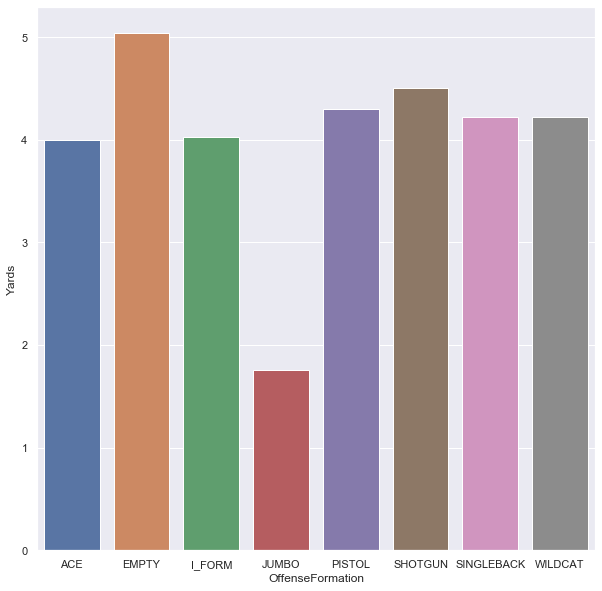

In [97]:
plt.figure(figsize=(10,10))
sns.barplot(avgs.index, 'Yards', data=avgs)

In [36]:
single_play = df[df['PlayId'] == 20181230154157]

In [37]:
run_before = df[df['PlayId'] == 20181230154135]

In [38]:
sea_run_before = run_before[run_before['Team'] == 'home']

In [39]:
# single_play['Team']

In [40]:
az_players = single_play[single_play['Team'] == 'away']
sea_players = single_play[single_play['Team'] == 'home']

In [41]:
az_players

,GameId,PlayId,Team,S,A,Dis,NflId,Quarter,GameClock,PossessionTeam,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,DefendersInTheBox,PlayDirection,TimeHandoff,TimeSnap,Yards,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,BMI,TimeDelta,IsBallCarrier,RunLeft,TeamOnOffense,IsOnOffense,YardLine_std,X_std,Y_std,Dir_std2,Dir_rad2,DistanceToBack,num_DL,num_LB,num_DB,num_QB,num_RB,num_WR,num_TE,num_OL
509740,2018123015,20181230154157,away,0.21,0.89,0.04,496841,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,41.867556,2.0,False,False,home,False,77,86.64,28.20,82.18,0.136485,6.126018,4,3,4,1,1,1,2,6
509741,2018123015,20181230154157,away,3.11,2.47,0.31,2495504,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,26.779696,2.0,False,False,home,False,77,90.09,42.83,130.60,5.574582,18.918100,4,3,4,1,1,1,2,6
509742,2018123015,20181230154157,away,1.08,2.78,0.11,2495807,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,28.728030,2.0,False,False,home,False,77,88.22,28.05,114.87,5.849122,7.612253,4,3,4,1,1,1,2,6
509743,2018123015,20181230154157,away,1.29,1.35,0.11,2533538,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,31.420982,2.0,False,False,home,False,77,85.82,30.07,247.08,3.541622,6.248104,4,3,4,1,1,1,2,6
509744,2018123015,20181230154157,away,1.13,1.88,0.11,2539293,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,30.297297,2.0,False,False,home,False,77,87.48,23.67,16.33,1.285784,7.197555,4,3,4,1,1,1,2,6
509745,2018123015,20181230154157,away,1.97,1.40,0.19,2540170,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,27.043535,2.0,False,False,home,False,77,99.14,29.81,248.21,3.521900,18.663526,4,3,4,1,1,1,2,6
509746,2018123015,20181230154157,away,1.35,2.17,0.12,2543769,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,27.835053,2.0,False,False,home,False,77,87.86,27.40,76.87,0.229162,7.137654,4,3,4,1,1,1,2,6
509747,2018123015,20181230154157,away,2.43,1.85,0.25,2555517,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,41.367644,2.0,False,False,home,False,77,87.43,27.78,13.99,1.326625,6.782463,4,3,4,1,1,1,2,6
509748,2018123015,20181230154157,away,1.93,0.88,0.21,2556515,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,31.157895,2.0,False,False,home,False,77,85.86,24.68,316.90,2.323033,5.328461,4,3,4,1,1,1,2,6
509749,2018123015,20181230154157,away,2.90,2.67,0.29,2557887,4,16.0,SEA,2,8,24,24,2558865,SINGLEBACK,9.0,right,2018-12-31 00:24:51,2018-12-31 00:24:49,11,SEA,ARI,17,CenturyLink Field,Outdoor,Field Turf,Cloudy,45.0,76.0,5.0,31.001126,2.0,False,False,home,False,77,87.82,21.82,40.07,0.871443,8.354717,4,3,4,1,1,1,2,6


In [44]:
sea_run_before[['X_std', 'Y_std', 'S', 'A', 'Dis', 'Dir_std2', 'Down', 'Distance', 'YardLine_std', 'GameClock', 'TimeSnap', 'TimeHandoff', 'TimeDelta', 'Yards']]

,X_std,Y_std,S,A,Dis,Dir_std2,Down,Distance,YardLine_std,GameClock,TimeSnap,TimeHandoff,TimeDelta,Yards
509729,83.49,28.99,3.04,2.66,0.38,353.66,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509730,84.06,22.27,3.65,0.69,0.36,358.07,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509731,82.20,36.31,3.25,1.87,0.32,338.02,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509732,80.62,23.88,0.46,0.33,0.04,127.18,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509733,84.09,25.66,1.72,0.55,0.17,359.17,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509734,84.23,7.77,2.26,0.36,0.22,102.30,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509735,84.96,24.77,2.79,1.13,0.29,19.98,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509736,84.90,23.78,3.74,0.84,0.38,15.99,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509737,84.19,26.77,1.75,0.85,0.20,9.23,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2
509738,84.36,42.29,1.56,1.58,0.15,89.70,1,10,75,56.0,2018-12-31 00:24:10,2018-12-31 00:24:11,1.0,2


In [49]:
sea_players[['IsBallCarrier', 'X_std', 'Y_std', 'S', 'A', 'Dis', 'Dir_std2', 'Down', 'Distance', 'YardLine_std', 'GameClock', 'TimeSnap', 'TimeHandoff', 'TimeDelta', 'Yards']]

,IsBallCarrier,X_std,Y_std,S,A,Dis,Dir_std2,Down,Distance,YardLine_std,GameClock,TimeSnap,TimeHandoff,TimeDelta,Yards
509751,False,85.12,29.18,0.96,1.04,0.10,221.23,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509752,False,86.76,22.02,2.58,0.74,0.26,41.26,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509753,False,81.82,26.99,3.08,1.43,0.32,266.73,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509754,False,87.34,41.37,3.96,1.48,0.39,136.00,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509755,False,86.00,27.50,0.06,0.72,0.02,86.49,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509756,False,85.68,24.31,1.04,0.35,0.10,326.53,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509757,False,86.77,24.20,2.14,2.12,0.22,15.31,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509758,False,86.76,27.18,1.16,0.66,0.11,42.80,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509759,False,87.26,27.05,2.59,1.18,0.26,21.12,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509760,False,84.57,24.37,4.36,1.79,0.47,183.34,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11


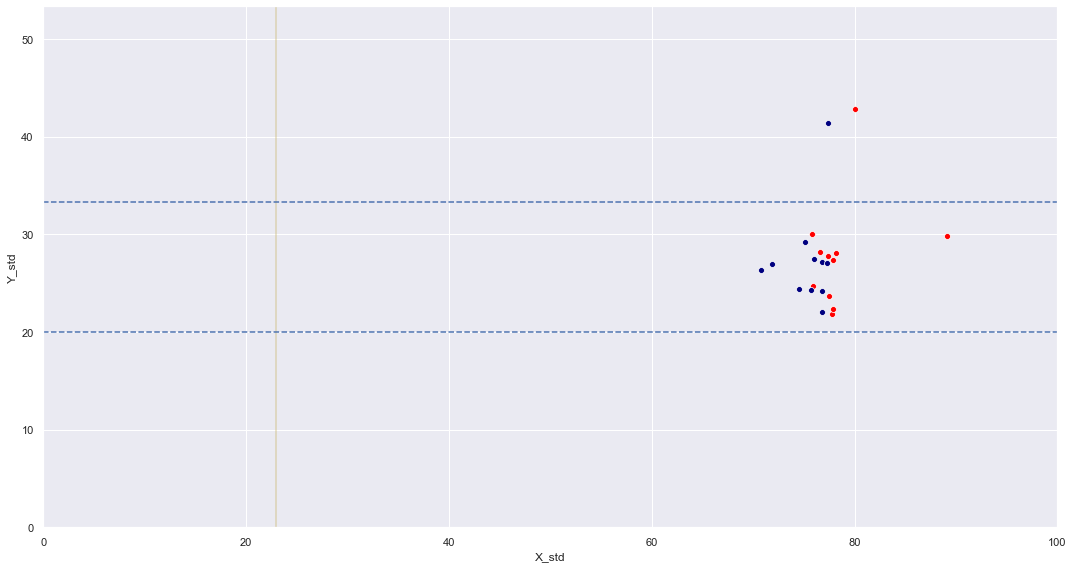

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(az_players['X_std'] - 10, az_players['Y_std'], marker='o', color='red')
sns.scatterplot(sea_players['X_std'] - 10, sea_players['Y_std'], marker='o', color='navy')
plt.tight_layout()
plt.ylim(0,53.33)
plt.xlim(0,100)
plt.axvline(100 - single_play['YardLine_std'][509740], alpha=.5, color='y')
plt.axhline(53.33 - 20, linestyle='--')
plt.axhline(20, linestyle='--')

In [63]:
rusher = sea_players[sea_players['NflIdRusher'] == 2558865]

In [66]:
rusher[['PlayId', 'IsBallCarrier', 'X_std', 'Y_std', 'S', 'A', 'Dis','Dir_std2','Dir_rad2', 'Down', 'Distance', 'YardLine_std', 'GameClock', 'TimeSnap', 'TimeHandoff', 'TimeDelta', 'Yards']]

,PlayId,IsBallCarrier,X_std,Y_std,S,A,Dis,Dir_std2,Dir_rad2,Down,Distance,YardLine_std,GameClock,TimeSnap,TimeHandoff,TimeDelta,Yards
509751,20181230154157,False,85.12,29.18,0.96,1.04,0.10,221.23,3.992790,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509752,20181230154157,False,86.76,22.02,2.58,0.74,0.26,41.26,0.850673,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509753,20181230154157,False,81.82,26.99,3.08,1.43,0.32,266.73,3.198665,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509754,20181230154157,False,87.34,41.37,3.96,1.48,0.39,136.00,5.480334,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509755,20181230154157,False,86.00,27.50,0.06,0.72,0.02,86.49,0.061261,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509756,20181230154157,False,85.68,24.31,1.04,0.35,0.10,326.53,2.154958,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509757,20181230154157,False,86.77,24.20,2.14,2.12,0.22,15.31,1.303586,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509758,20181230154157,False,86.76,27.18,1.16,0.66,0.11,42.80,0.823795,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509759,20181230154157,False,87.26,27.05,2.59,1.18,0.26,21.12,1.202183,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11
509760,20181230154157,False,84.57,24.37,4.36,1.79,0.47,183.34,4.654095,2,8,77,16.0,2018-12-31 00:24:49,2018-12-31 00:24:51,2.0,11


In [67]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [68]:
vor = Voronoi(az_players[['X_std', 'Y_std']])

In [85]:
def get_dx_dy(angle, dist):
    radian_angle = (90 - angle)* math.pi/180.0
    dx = dist * math.cos(radian_angle)
    dy = dist * math.sin(radian_angle)
    return dx, dy

def vor_w_arrow(play_id):
    plt.figure(figsize=(15, 8))
    play_id = df[df['PlayId'] == play_id]
#     fig, ax = create_football_field()
    fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                    line_width=2, line_alpha=0.6, point_size=15)
#     plt.figure(figsize=(15, 8))
    plt.xlim(0,100)
    plt.ylim(0, 53.33)
    plt.tight_layout()
    plt.axvline(110 - single_play['YardLine_std'][509740], alpha=.5, color='y')
    plt.scatter(rusher[rusher['IsBallCarrier'] == 1]['X_std'], rusher[rusher['IsBallCarrier'] == 1]['Y_std'], color='black')
#     dx, dy = get_dx_dy(rusher[rusher['IsBallCarrier'] == 1]['Dir_rad2'], rusher[rusher['IsBallCarrier'] == 1]['Dis'])
#     ax.arrow(x, y, dx, dy)

    plt.show()

<Figure size 1080x576 with 0 Axes>

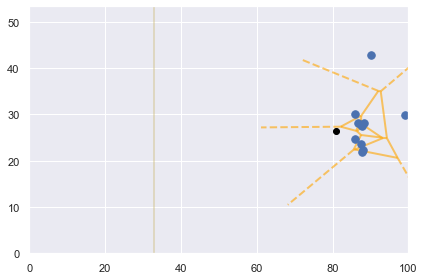

In [86]:
vor_w_arrow(20170907000118)

In [ ]:
# points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]])
# v = Voronoi(points)
# voronoi_plot_2d(v)

# p2 = [[0.25, 1], [1, 0.75], [1.75, 0.25], [1.75, 1.75]]
# x, y = zip(*p2)

# plt.scatter(x, y, color='r')
# plt.show()

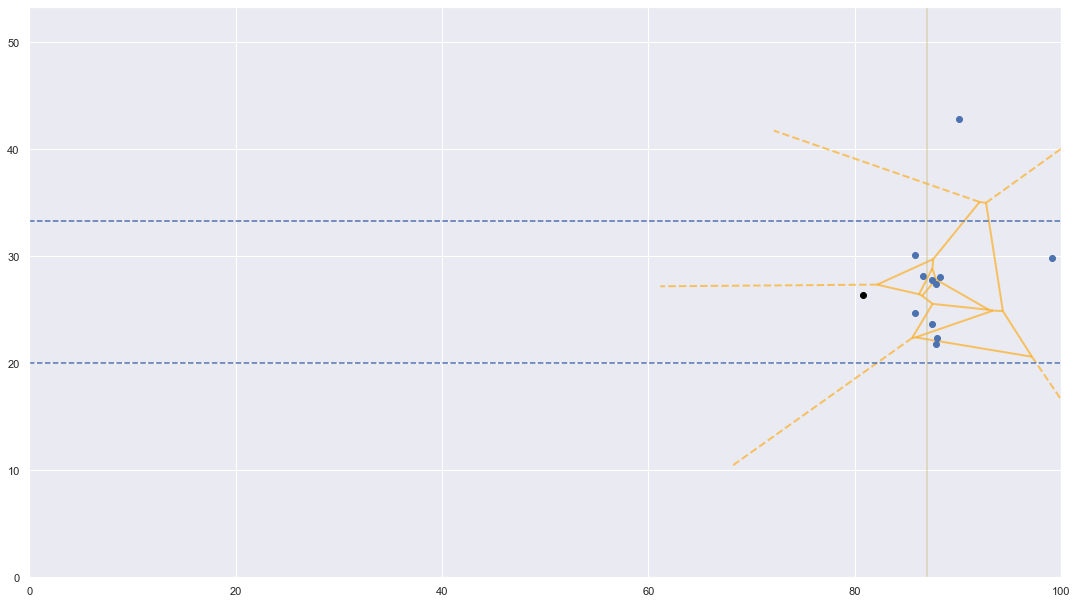

In [92]:
ax = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=12)
plt.scatter(rusher[rusher['IsBallCarrier'] == 1]['X_std'], rusher[rusher['IsBallCarrier'] == 1]['Y_std'], color='black')
ax.set_size_inches(18.5, 10.5)
plt.xlim(0,100)
plt.ylim(0, 160/3)
plt.plot(rusher[rusher['IsBallCarrier'] == 1]['Dir_rad2'].values[0], rusher[rusher['IsBallCarrier'] == 1]['S'].values[0])
# dx, dy = get_dx_dy(rusher[rusher['IsBallCarrier'] == 1]['Dir'].values[0], rusher[rusher['IsBallCarrier'] == 1]['S'].values[0])
# ax2.arrow(rusher[rusher['IsBallCarrier'] == 1]['X'].values[0], rusher[rusher['IsBallCarrier'] == 1]['Y'].values[0], 
#          dx, dy, length_includes_head=True, width=0.3, color='black')
# plt.arrow(rusher[rusher['IsBallCarrier'] == 1]['X_std'].values[0], rusher[rusher['IsBallCarrier'] == 1]['Y_std'].values[0], dx, dy, length_includes_head=False, width=0.2, color='black', alpha=0.5)
plt.axvline(single_play['YardLine_std'][509740] + 10, alpha=.5, color='y')
plt.axhline(53.33 - 20, linestyle='--')
plt.axhline(20, linestyle='--')
plt.show()

In [ ]:
def euclidean_distance(x1,y1,x2,y2):
    x_diff = (x1-x2)**2
    y_diff = (y1-y2)**2

    return np.sqrt(x_diff + y_diff)

In [77]:
def get_dx_dy(angle, dist):
    radian_angle = (90 - angle)* math.pi/180.0
    dx = dist * math.cos(radian_angle)
    dy = dist * math.sin(radian_angle)
    return dx, dy

In [97]:
def get_dx_dy2(radian_angle, dist):
    dx = dist * math.cos(radian_angle)
    dy = dist * math.sin(radian_angle)
    return dx, dy

In [98]:
get_dx_dy2(rusher[rusher['IsBallCarrier'] == 1]['Dir_rad'].values[0], rusher[rusher['IsBallCarrier'] == 1]['S'].values[0])

(4.290340139766445, -2.3043180086760677)

In [79]:
def get_dx_dy(angle, dist):
    radian_angle = (90 - angle)* math.pi/180.0
    dx = dist * math.cos(radian_angle)
    dy = dist * math.sin(radian_angle)
    return dx, dy

def show_play(play_id):
    play_id = df[df['PlayId'] == play_id]
                
    fig, ax = create_football_field(figsize=(15, 8))
    for x, y in az_players.iterrows():
        plt.scatter(az_players['X'], az_players['Y'], color='crimson')
    ax.scatter(rusher[rusher['IsBallCarrier'] == 1]['X'], rusher[rusher['IsBallCarrier'] == 1]['Y'], color='black')
    dx, dy = get_dx_dy(rusher[rusher['IsBallCarrier'] == 1]['Dir'].values[0], rusher[rusher['IsBallCarrier'] == 1]['S'].values[0])
    ax.arrow(rusher[rusher['IsBallCarrier'] == 1]['X'].values[0], rusher[rusher['IsBallCarrier'] == 1]['Y'].values[0], 
             dx, dy, length_includes_head=True, width=0.3, color='black')
    plt.show()

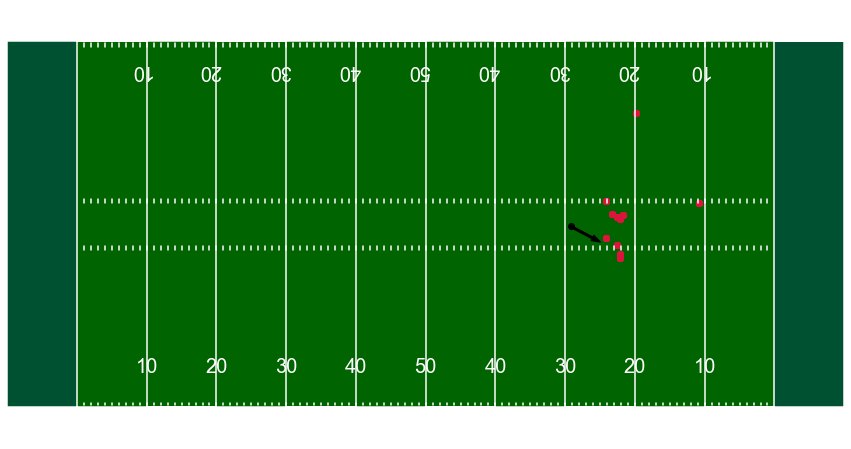

In [80]:
show_play(20181230154157)

In [458]:
rusher[rusher['IsBallCarrier'] == 1]['X'].values[0]

80.8

In [455]:
print(dx,'\n', dy)

-0.0014732479135544467 
 -0.2129199031692087


In [289]:
#     x = rusher_row["X"].values[0]
#     y = rusher_row["Y"].values[0]
#     rusher_dir = rusher_row["Dir_rad"].values[0]
#     rusher_speed = rusher_row["S"].values[0]
#     dx, dy = get_dx_dy(rusher_dir, rusher_speed)

In [ ]:
# x = rusher[rusher['IsBallCarrier'] == 1]['X'] 
# y = rusher[rusher['IsBallCarrier'] == 1]['Y']
# rusher_dir = rusher[rusher['IsBallCarrier'] == 1]['Dir_std2']
# rusher_speed = rusher[rusher['IsBallCarrier'] == 1]['Dis']
# dx, dy = get_dx_dy(rusher_dir, rusher_speed)

In [ ]:
def euclidean_distance(x1,y1,x2,y2):
    x_diff = (x1-x2)**2
    y_diff = (y1-y2)**2

    return np.sqrt(x_diff + y_diff)

In [ ]:
euclidean_distance(rusher[rusher['IsBallCarrier'] == 1]['X'], rusher[rusher['IsBallCarrier'] == 1]['Y'], 
                   az_players['X'][509748], az_players['Y'][509748])

In [ ]:
euclidean_distance(rusher[rusher['IsBallCarrier'] == 1]['X'], rusher[rusher['IsBallCarrier'] == 1]['Y'], 
                   az_players['X'][509743], az_players['Y'][509743])